# K-means clustering

The notebook aims to study and implement a k-means clustering using "sklearn". The iris dataset will be used to identify clusters automatically using the K-means method.


## Acknowledgments

- Used dataset: https://archive.ics.uci.edu/ml/datasets/iris

- Inquiries: mauricio.antelis@tec.mx


# Importing libraries

In [33]:
# Import the packages that we will be using
import numpy as np                  # For array
import pandas as pd                 # For data handling
import seaborn as sns               # For advanced plotting
import matplotlib.pyplot as plt     # For showing plots

# Note: specific functions of the "sklearn" package will be imported when needed to show concepts easily


In [ ]:
# Define where you are running the code: colab or local
RunInColab          = False     # (False: no  | True: yes)

# If running in colab:
if RunInColab:
    # Mount your google drive in google colab
    from google.colab import drive
    drive.mount('/content/drive')

    # Find location
    #!pwd
    #!ls
    #!ls "/content/drive/My Drive/Colab Notebooks/MachineLearningWithPython/"

    # Define path del proyecto
    Ruta            = "/content/drive/My Drive/Colab Notebooks/MachineLearningWithPython/"

else:
    # Define path del proyecto
    Ruta            = ""

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Importing data

In [34]:
# Define the col names for the iris dataset

# Dataset url

from ucimlrepo import fetch_ucirepo 
iris = fetch_ucirepo(id=53) 

# Load the dataset from HHDD

# data
X = iris.data.features 
y = iris.data.targets 





# Undertanding and preprocessing the data

1. Get a general 'feel' of the data


In [36]:
# Print the head of the iris dataset
print(X.head())
print(y.head())

   sepal length  sepal width  petal length  petal width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2
         class
0  Iris-setosa
1  Iris-setosa
2  Iris-setosa
3  Iris-setosa
4  Iris-setosa


2. Drop rows with any missing values


In [37]:
# Drop rows with any missing values
X_clean = X.dropna()
print(X_clean.head())

Y_clean = y.dropna()
print(Y_clean.head())



   sepal length  sepal width  petal length  petal width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2
         class
0  Iris-setosa
1  Iris-setosa
2  Iris-setosa
3  Iris-setosa
4  Iris-setosa


3. Encoding the class label categorical column: from string to num


In [38]:
# Encoding the categorical column {"Iris-setosa":0, "Iris-versicolor":1, "Iris-virginica":2}

Y_clean['class'] = Y_clean['class'].map({"Iris-setosa": 0, "Iris-versicolor": 1, "Iris-virginica": 2})


#Visualize the dataset

print(Y_clean)

     class
0        0
1        0
2        0
3        0
4        0
..     ...
145      2
146      2
147      2
148      2
149      2

[150 rows x 1 columns]


Now the label/category is numeric


4. Discard columns that won't be used


In [ ]:
# If necesary, drop out non necesary columns


5. Scatter plot of the data

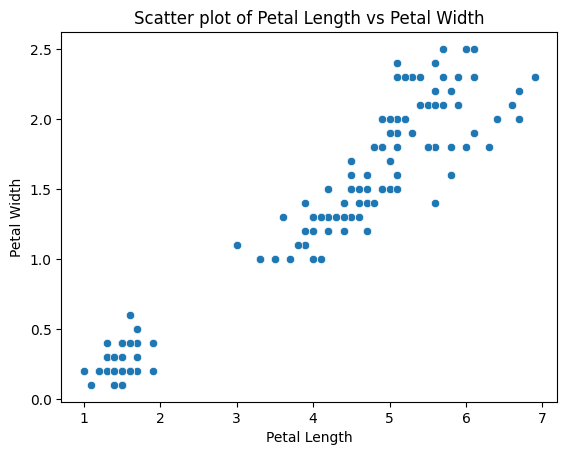

In [39]:
# Scatter plot of petal width vs petal length
sns.scatterplot(data=X_clean, x='petal length', y='petal width')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('Scatter plot of Petal Length vs Petal Width')
plt.show()

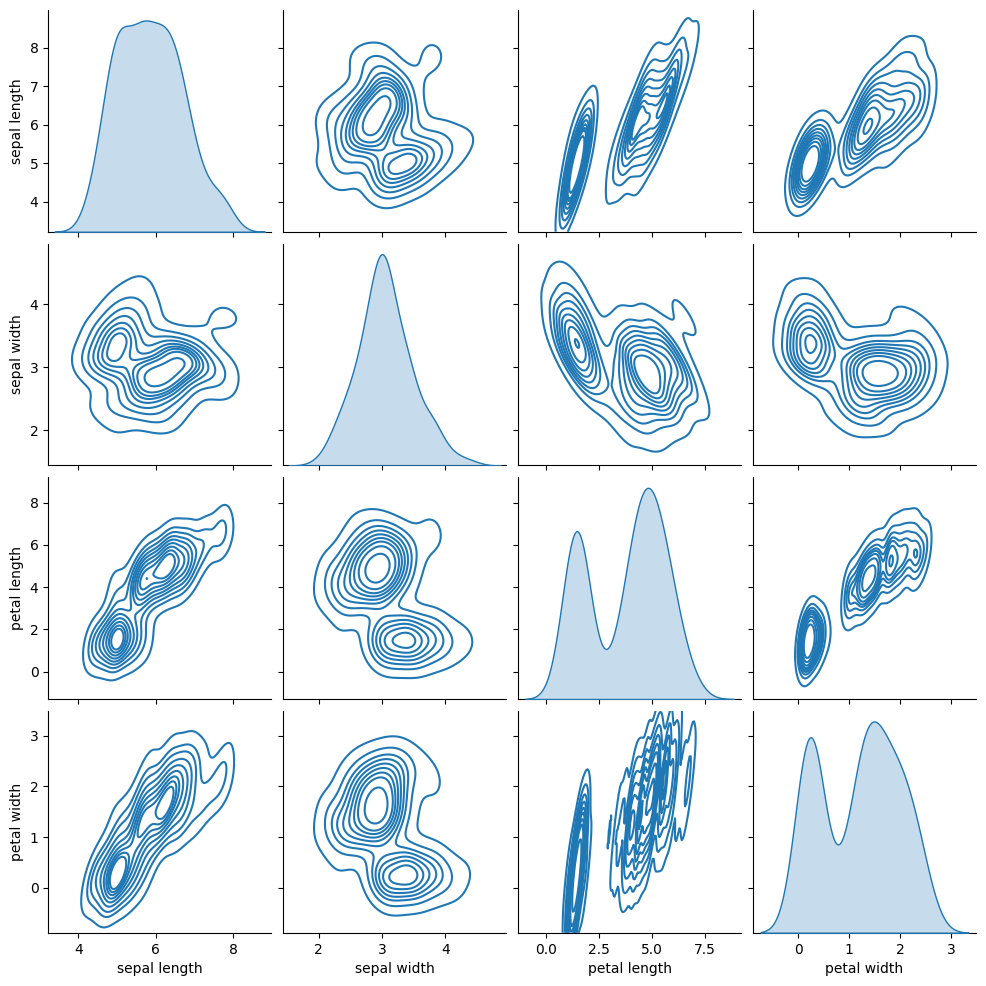

In [41]:
# Pairplot: Scatterplot of all variables
sns.pairplot(X_clean, kind='kde')
plt.show()


6. Scatter plot of the data asigning each point to the cluster it belongs to ¡¡

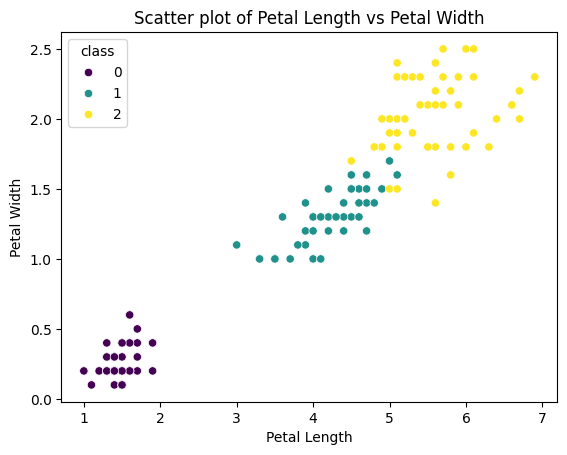

In [14]:
# Get dataframes for each real cluster

sns.scatterplot(data=X_clean, x='petal length', y='petal width', hue=Y_clean['class'], palette='viridis')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('Scatter plot of Petal Length vs Petal Width')
plt.show()

Recall that for this dataset we know in advance the class to which each point belongs to

# Kmeans clustering

Kmeans clustering

In [25]:


# Import sklearn KMeans
from sklearn.cluster import KMeans

# Define number of clusters
num_clusters =  3

# Do K-means cluste

kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X_clean)

# Print estimated cluster of each point in the dataset

print(kmeans.labels_)


# Print estimated cluster of each point in the dataset42)




[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


NOTE: the lables of the estimated clusters do not agree with the lables in the real labels, therefore, it will be important to pair the labels of the real and estimated clusters

In [42]:
# Manual pairing the labels of the real and estimated clusters

# Create a DataFrame with the real and estimated labels
cluster_comparison = pd.DataFrame({'Real': Y_clean['class'], 'Estimated': kmeans.labels_})

# Create a mapping from estimated clusters to real clusters
mapping = cluster_comparison.groupby('Estimated')['Real'].agg(lambda x: x.value_counts().index[0])

# Apply the mapping to the estimated labels
cluster_comparison['Mapped_Estimated'] = cluster_comparison['Estimated'].map(mapping)

# Print the mapping and the comparison
print("Mapping of estimated clusters to real clusters:")
print(mapping)
print("\nComparison of real and mapped estimated clusters:")
print(cluster_comparison.head())


Mapping of estimated clusters to real clusters:
Estimated
0    2
1    0
2    1
Name: Real, dtype: int64

Comparison of real and mapped estimated clusters:
   Real  Estimated  Mapped_Estimated
0     0          1                 0
1     0          1                 0
2     0          1                 0
3     0          1                 0
4     0          1                 0


In [43]:
# Add a new column to the dataset with the cluster information
X_clean['Cluster'] = cluster_comparison['Mapped_Estimated']
print(X_clean.head())


   sepal length  sepal width  petal length  petal width  Cluster
0           5.1          3.5           1.4          0.2        0
1           4.9          3.0           1.4          0.2        0
2           4.7          3.2           1.3          0.2        0
3           4.6          3.1           1.5          0.2        0
4           5.0          3.6           1.4          0.2        0


In [45]:
# Label of the estimated clusters
print("Different cluster labels:", X_clean['Cluster'].unique())


Different cluster labels: [0 2 1]


In [46]:
# Cluster centroids
centroids = kmeans.cluster_centers_
print("Cluster centroids:")
print(centroids)



Cluster centroids:
[[6.85384615 3.07692308 5.71538462 2.05384615]
 [5.006      3.418      1.464      0.244     ]
 [5.88360656 2.74098361 4.38852459 1.43442623]]


In [48]:
# Sum of squared error (sse) of the final model
sse = kmeans.inertia_
print( sse)




78.9450658259773


In [49]:
# The number of iterations required to converge
iterations = kmeans.n_iter_
print("Number of iterations required to converge:", iterations)


Number of iterations required to converge: 12


<span style='color:Blue'> **Important remarks**  </span>

- The number of each cluster is randomly assigned
- The order of the numer in each cluster is random

# Plot estimated clusters

Plot estimated clusters

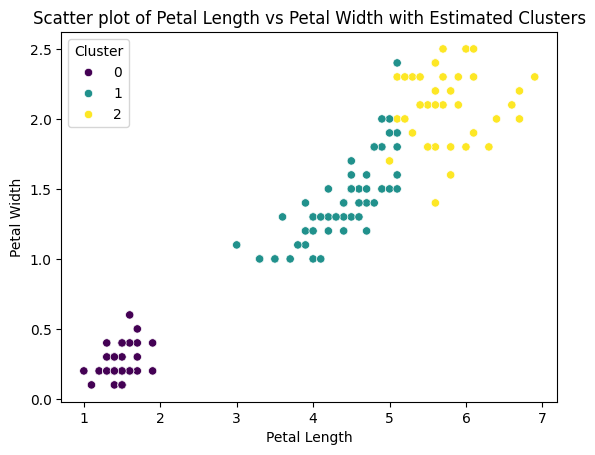

In [50]:
# Plot estimated clusters
sns.scatterplot(data=X_clean, x='petal length', y='petal width', hue='Cluster', palette='viridis')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('Scatter plot of Petal Length vs Petal Width with Estimated Clusters')
plt.show()

## Plot both real and estimated clusters to check for errors

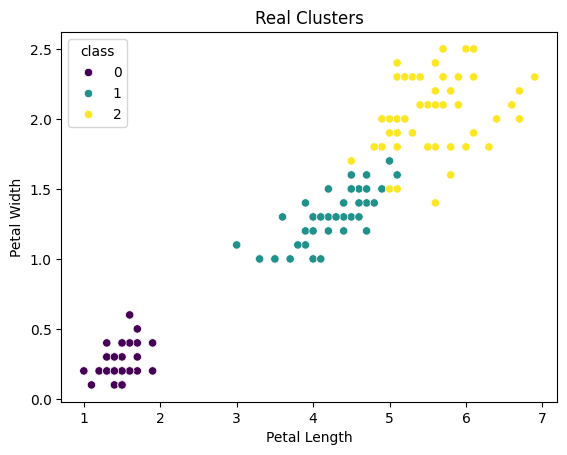

In [53]:

# Get dataframes for each real cluster

sns.scatterplot(data=X_clean, x='petal length', y='petal width', hue=Y_clean['class'], palette='viridis')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('Real Clusters')
plt.show()

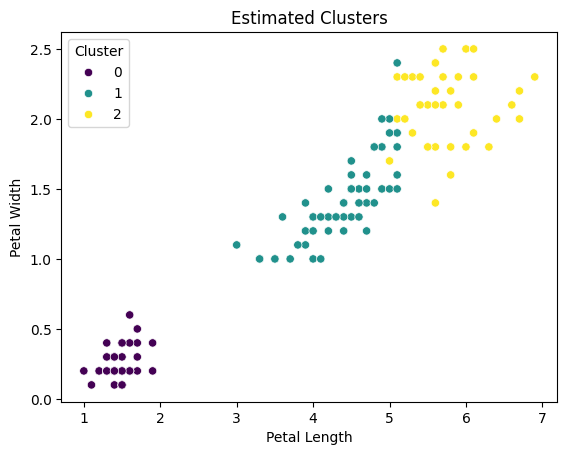

In [54]:

# Plot estimated clusters
sns.scatterplot(data=X_clean, x='petal length', y='petal width', hue='Cluster', palette='viridis')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('Estimated Clusters')
plt.show()

<span style='color:Blue'> **Important remarks**  </span>

- Note that for K=2 ...
- Note that for K=3 ...
- Note that for K=4 ...

Concluir

# Selecting K: elbow plot

Check the acurracy of the model using k-fold cross-validation

In [ ]:
# Intialize a list to hold sum of squared error (sse)

# Define values of k


# For each k



In [ ]:
# Plot sse versus k


Choose the k after which the sse is minimally reduced


# Final remarks

- The number of each cluster need to be assigned assigned

- The order of the number in each cluster is random

- If there is no information about the number of clusters k, then use the elbow plot method to choose the best number of clusters k